# III. Model Building

Predicting the salary based on job state, company rating, company industry and other variables.

#### Importing essential librairies

In [679]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [680]:
df = pd.read_csv("../data/glassdoor-data-engineer-eda.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_state,company_age,job_simp,seniority,job_languages,job_cloud,job_viz,job_bigdata,job_data,job_education
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,70000.0,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,CA,-1,data engineer,na,"['sql', 'python', 'java']",[],[],[],[],na
1,Futuretech Consultants LLC,4.4,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,88400.0,NaN,NaN,NaN,NaN,...,MS,-1,data engineer,na,"['sql', 'c']",[],[],[],['snowflake'],bachelor
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,140400.0,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,Remote,-1,data engineer,na,"['sql', 'python']",['aws'],[],['spark'],[],master
3,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,135200.0,1 to 50 Employees,Company - Public,NaN,NaN,...,MD,-1,data engineer,na,['sql'],[],['tableau'],[],[],bachelor
4,Steward Health Care,2.7,"Westwood, MA",Data Engineer,Position Purpose:\nReporting to the Manager of...,94536.0,10000+ Employees,Hospital,Healthcare,Health Care Services & Hospitals,...,MA,25,data engineer,na,"['sql', 'r', 'python']",[],[],[],[],bachelor


Making a new dataframe with relevant columns for the model

In [681]:
cols_model = ['job_state', 'seniority', 'job_education', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model.head()

,job_state,seniority,job_education,company_industry,company_rating,salary_estimate
0,CA,na,na,Information Technology Support Services,4.7,70000.0
1,MS,na,bachelor,NaN,4.4,88400.0
2,Remote,na,master,Biotech & Pharmaceuticals,4.4,140400.0
3,MD,na,bachelor,NaN,5.0,135200.0
4,MA,na,bachelor,Health Care Services & Hospitals,2.7,94536.0


In [682]:
from sklearn.preprocessing import LabelEncoder

In [683]:
le_state = LabelEncoder()
df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

C:\Users\hamza\AppData\Local\Temp\ipykernel_14520\99198208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['job_state'] = le_state.fit_transform(df_model['job_state'])


array([ 0,  8, 14,  6,  5,  3, 15,  7, 10, 17,  9,  1, 18,  4, 12, 13, 16,
       11,  2])

In [684]:
le_sen = LabelEncoder()
df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

C:\Users\hamza\AppData\Local\Temp\ipykernel_14520\2327077964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])


array([0, 1])

In [685]:
le_edu = LabelEncoder()
df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

C:\Users\hamza\AppData\Local\Temp\ipykernel_14520\3943646228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])


array([2, 0, 1])

In [686]:
le_indu = LabelEncoder()
df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

C:\Users\hamza\AppData\Local\Temp\ipykernel_14520\79438552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])


array([14, 23,  5, 13, 15, 12,  8,  7, 16,  0,  6,  9, 10, 21,  3, 22,  2,
       20, 17,  1, 19,  4, 18, 11])

In [687]:
le_rating = LabelEncoder()
df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

C:\Users\hamza\AppData\Local\Temp\ipykernel_14520\3458811746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])


array([21, 18, 24,  2, 12, 22, 15,  0,  5,  9, 14, 19, 16, 17,  6,  1, 10,
       23,  3, 13, 11,  8, 20,  4,  7], dtype=int64)

In [688]:
df_model.head()

,job_state,seniority,job_education,company_industry,company_rating,salary_estimate
0,0,0,2,14,21,70000.0
1,8,0,0,23,18,88400.0
2,14,0,1,5,18,140400.0
3,6,0,0,23,24,135200.0
4,5,0,0,13,2,94536.0


<Axes: >

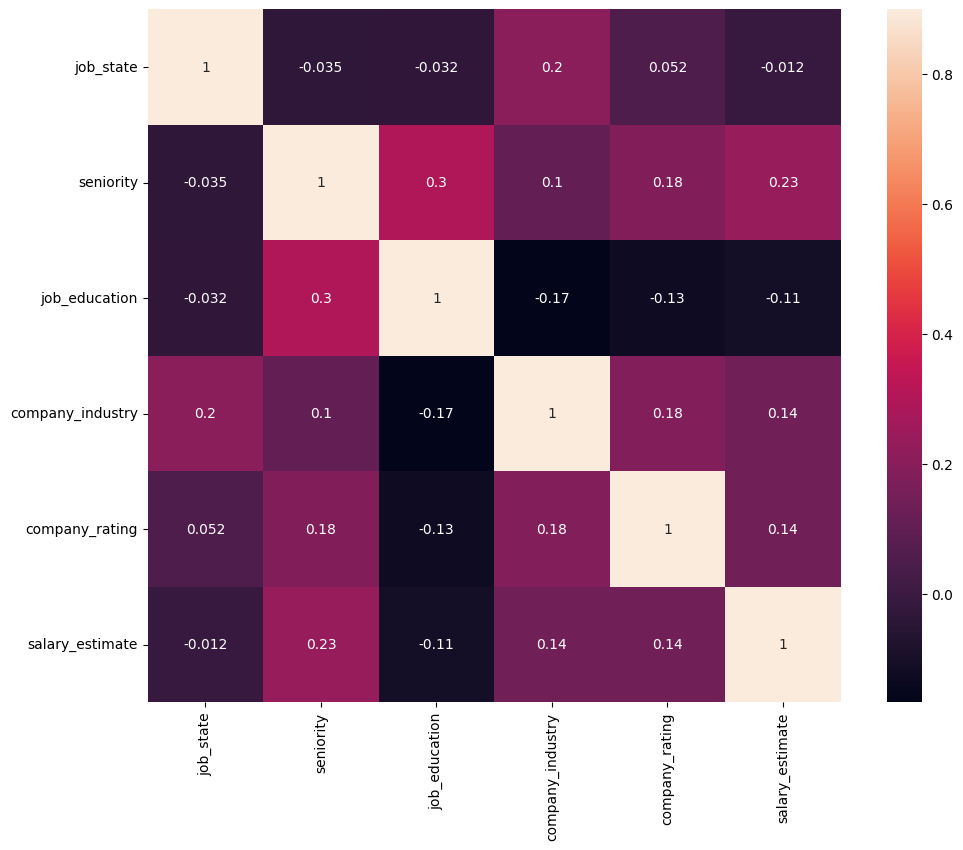

In [689]:
corrmat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True, square=True)

The salary is moderatly correlated with the seniority, company industry and company rating. Suprisingly it is negatively correlated with the education required.

In [690]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [691]:
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [693]:
max_depth = [None, 2, 4, 6, 8, 10, 12]

parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [694]:
regressor = gs.best_estimator_

regressor.fit(X, y)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("Error : ${:,.02f}".format(error))    

Error : $5,915.58


Let's test our model on an example

In [695]:
# job_state, seniority, job_education, company_industry, company_rating

X_example =  np.array([["CA", "senior", "bachelor", "Information Technology Support Services", 4.7]])

In [696]:
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_indu.transform(X_example[:,3])
X_example[:, 4] = le_rating.transform(X_example[:,4])

X_example = X_example.astype(float)
X_example

array([[ 0.,  1.,  0., 14., 21.]])

In [697]:
y_pred = regressor.predict(X_example)
y_pred

c:\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([97458.45])

For a senior data engineer who's looking to work in California (CA) state, with a bachelor and in a company in the IT Support Services industry that has a 4.7 rating on Glassdoor, he is expected to get $97,458 /year.